# Ejercicios Prácticos. Nivel Avanzado

![](https://pycaret.org/wp-content/uploads/2020/03/Divi93_43.png)

Más información en: https://pycaret.org y https://www.kaggle.com/frtgnn/pycaret-introduction-classification-regression


# Instalación de Pycaret

In [1]:
import numpy as np 
import pandas as pd 


In [2]:
#!pip install pycaret

# Regresión: Estimación del valor de la vivienda

![](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSYeyNpaoAW-3rFX9-ORmiJ-uLAAswYBRhszs2QzllV7MCfFPvk&usqp=CAU)

# Importa todo el paquete de regresión

In [3]:
from pycaret.regression import *

# Analisis de los datos

In [4]:
train = pd.read_csv('data/train.csv')
test  = pd.read_csv('data/test.csv')
sample= pd.read_csv('data/sample_submission.csv')

In [5]:
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Analysis Exploratorio (EDA)

In [7]:
import pandas_profiling as prof
a = prof.ProfileReport(train, title='Downloads', minimal=True)
a

### Separación de datos para validación

In [8]:
#check the shape of data
train.shape

(1460, 81)

In [9]:
data = train.sample(frac=0.9, random_state=786)
data_unseen = train.drop(data.index)

train.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(train.shape))
print('Unseen Data For Predictions ' + str(data_unseen.shape))

Data for Modeling: (1460, 81)
Unseen Data For Predictions (146, 81)


# Set up del entorno (pre-procesamiento)

In [10]:
reg = setup(train, target = 'SalePrice', session_id = 123, 
             normalize = True, normalize_method = 'zscore',
             transformation = True, transformation_method = 'yeo-johnson', transform_target = True,
             numeric_features=['OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 
                               'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 
                               'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'PoolArea'],
             ordinal_features= {'ExterQual': ['Fa', 'TA', 'Gd', 'Ex'],
                                'ExterCond' : ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
                                'BsmtQual' : ['Fa', 'TA', 'Gd', 'Ex'], 
                                'BsmtCond' : ['Po', 'Fa', 'TA', 'Gd'],
                                'BsmtExposure' : ['No', 'Mn', 'Av', 'Gd'],
                                'HeatingQC' : ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
                                'KitchenQual' : ['Fa', 'TA', 'Gd', 'Ex'],
                                'FireplaceQu' : ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
                                'GarageQual' : ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
                                'GarageCond' : ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
                                'PoolQC' : ['Fa', 'Gd', 'Ex']},
             polynomial_features = True, 
             trigonometry_features = True, 
             remove_outliers = True, outliers_threshold = 0.01,
             silent = True #silent is set to True for unattended run during kernel execution
             )

 
Setup Succesfully Completed.


# Entrenamiento y comparación de diferentes modelos

In [11]:
#blacklisted Thielsen Regressor due to longer training times
compare_models(exclude = ['tr']) 

OrthogonalMatchingPursuit(fit_intercept=True, n_nonzero_coefs=None,
                          normalize=True, precompute='auto', tol=None)

# Entrenamiento de Modelos

In [12]:
models()

Name  \
ID                                            
lr                        Linear Regression   
lasso                      Lasso Regression   
ridge                      Ridge Regression   
en                              Elastic Net   
lar                  Least Angle Regression   
llar           Lasso Least Angle Regression   
omp             Orthogonal Matching Pursuit   
br                           Bayesian Ridge   
ard       Automatic Relevance Determination   
par            Passive Aggressive Regressor   
ransac              Random Sample Consensus   
tr                       TheilSen Regressor   
huber                       Huber Regressor   
kr                             Kernel Ridge   
svm                  Support Vector Machine   
knn                   K Neighbors Regressor   
dt                            Decision Tree   
rf                            Random Forest   
et                    Extra Trees Regressor   
ada                      AdaBoost Regressor   
gbr             Gradient Boosting Regressor   
mlp                  Multi Level Perceptron   
xgboost           Extreme Gradient Boosting   
lightgbm    Light Gradient Boosting Machine   
catboost                 CatBoost Regressor   

                                           Reference  Turbo  
ID                                                           
lr             sklearn.linear_model.LinearRegression   True  
lasso                     sklearn.linear_model.Lasso   True  
ridge                     sklearn.linear_model.Ridge   True  
en                   sklearn.linear_model.ElasticNet   True  
lar                        sklearn.linear_model.Lars   True  
llar                  sklearn.linear_model.LassoLars   True  
omp                         sklearn.linear_model.OMP   True  
br                sklearn.linear_model.BayesianRidge   True  
ard               sklearn.linear_model.ARDRegression  False  
par                         sklearn.linear_model.PAR   True  
ransac          sklearn.linear_model.RANSACRegressor   True  
tr            sklearn.linear_model.TheilSenRegressor   True  
huber            sklearn.linear_model.HuberRegressor   True  
kr                  sklearn.kernel_ridge.KernelRidge  False  
svm                                  sklearn.svm.SVR   True  
knn            sklearn.neighbors.KNeighborsRegressor   True  
dt                sklearn.tree.DecisionTreeRegressor   True  
rf            sklearn.ensemble.RandomForestRegressor   True  
et              sklearn.ensemble.ExtraTreesRegressor   True  
ada               sklearn.ensemble.AdaBoostRegressor   True  
gbr       sklearn.ensemble.GradientBoostingRegressor   True  
mlp              sklearn.neural_network.MLPRegressor  False  
xgboost                       xgboost.readthedocs.io   True  
lightgbm               github.com/microsoft/LightGBM   True  
catboost                         https://catboost.ai   True

In [13]:
huber = create_model('huber', verbose = False)

In [14]:
omp = create_model('omp', verbose = False)

In [15]:
br = create_model('br', verbose = False)

In [17]:
lightgbm = create_model('lightgbm', verbose = False)

# Optimización del modelo

In [19]:
huber = tune_model(huber, n_iter = 50)

In [20]:
omp = tune_model(omp, n_iter = 50)

In [22]:
lightgbm = tune_model(lightgbm, n_iter = 50)

In [23]:
br = tune_model(br, n_iter = 50)

## Ensamblado de modelos

In [24]:
blend_all = blend_models(estimator_list = [huber, omp, lightgbm, br])

## Evaluación de modelos

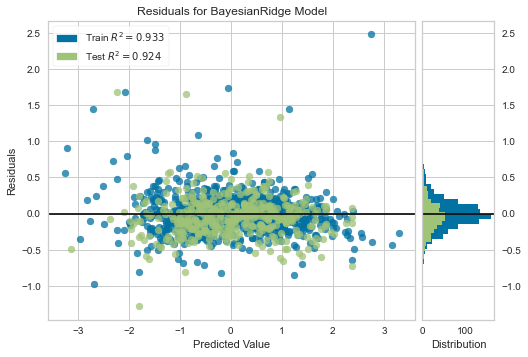

In [25]:
plot_model(br, plot = 'residuals')

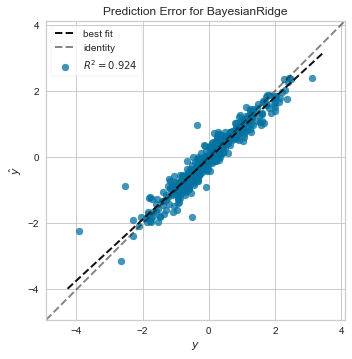

In [26]:
plot_model(br, plot = 'error')

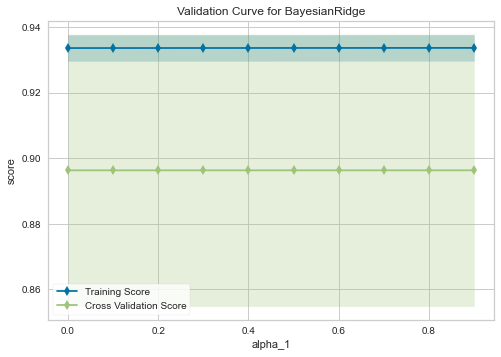

In [27]:
plot_model(br, plot = 'vc')

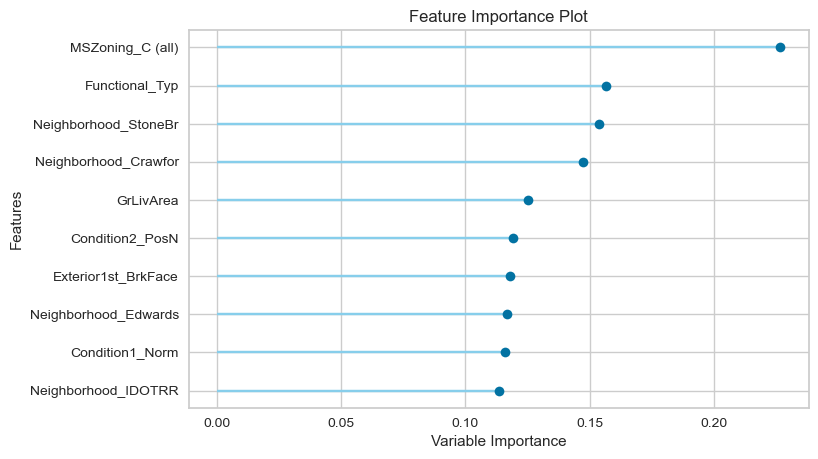

In [28]:
plot_model(br, plot = 'feature')

# Interpretación del modelo

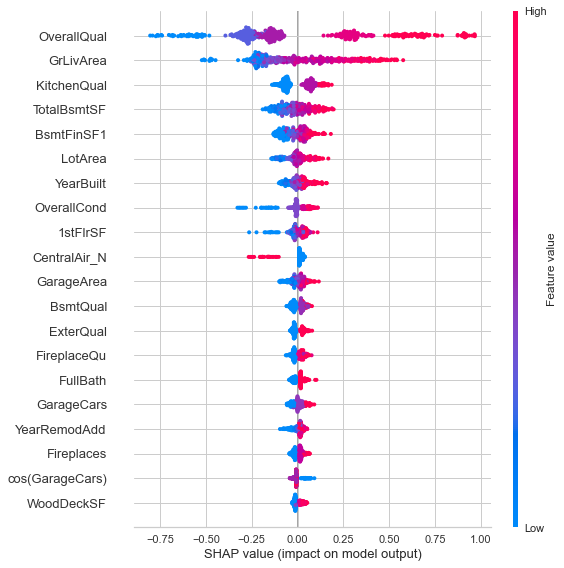

In [29]:
interpret_model(lightgbm)

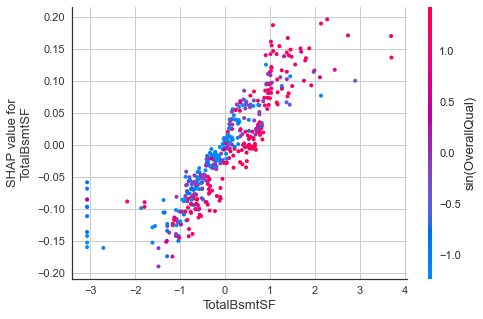

In [30]:
interpret_model(lightgbm, plot = 'correlation', feature = 'TotalBsmtSF')

In [31]:
interpret_model(lightgbm, plot = 'reason', observation = 0)

## Finalizacion del Modelo

In [32]:
# check predictions on hold-out
predict_model(blend_all);

Model         MAE           MSE       RMSE      R2   RMSLE  \
0  Voting Regressor  13032.1713  4.173660e+08  20429.538  0.9313  0.1038   

     MAPE  
0  0.0715

In [33]:
final_blender = finalize_model(blend_all)
print(final_blender)

VotingRegressor(estimators=[('Huber Regressor_0',
                             HuberRegressor(alpha=0.8712000000000001,
                                            epsilon=1.3, fit_intercept=True,
                                            max_iter=100, tol=1e-05,
                                            warm_start=False)),
                            ('Orthogonal Matching Pursuit_1',
                             OrthogonalMatchingPursuit(fit_intercept=True,
                                                       n_nonzero_coefs=65,
                                                       normalize=False,
                                                       precompute='auto',
                                                       tol=None)),
                            ('Light Gradient Boosting Machine_2',
                             LGBMRegressor(b...
                                           reg_alpha=0.5, reg_lambda=0.2,
                                           silent=True, s

## Predicciones con datos de test

In [34]:
predictions = predict_model(final_blender, data = test)
predictions.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
index                                                                          
0      1461          20       RH         80.0    11622   Pave   NaN      Reg   
1      1462          20       RL         81.0    14267   Pave   NaN      IR1   
2      1463          60       RL         74.0    13830   Pave   NaN      IR1   
3      1464          60       RL         78.0     9978   Pave   NaN      IR1   
4      1465         120       RL         43.0     5005   Pave   NaN      IR1   

      LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
index                        ...                                              
0             Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1             Lvl    AllPub  ...        0    NaN    NaN        Gar2   12500   
2             Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
3             Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4             HLS    AllPub  ...        0    NaN    NaN         NaN       0   

      MoSold YrSold  SaleType  SaleCondition        Label  
index                                                      
0          6   2010        WD         Normal  119404.1862  
1          6   2010        WD         Normal  159271.5505  
2          3   2010        WD         Normal  187487.5128  
3          6   2010        WD         Normal  195135.2678  
4          1   2010        WD         Normal  195642.6932  

[5 rows x 81 columns]

## Validación del modelo: predicción con datos no vistos

In [35]:
unseen_predictions = predict_model(final_blender, data=data_unseen)
unseen_predictions.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
index                                                                        
0       6          50       RL         85.0    14115   Pave   NaN      IR1   
1       8          60       RL          NaN    10382   Pave   NaN      IR1   
2      14          20       RL         91.0    10652   Pave   NaN      IR1   
3      18          90       RL         72.0    10791   Pave   NaN      Reg   
4      33          20       RL         85.0    11049   Pave   NaN      Reg   

      LandContour Utilities  ... PoolQC  Fence MiscFeature MiscVal MoSold  \
index                        ...                                            
0             Lvl    AllPub  ...    NaN  MnPrv        Shed     700     10   
1             Lvl    AllPub  ...    NaN    NaN        Shed     350     11   
2             Lvl    AllPub  ...    NaN    NaN         NaN       0      8   
3             Lvl    AllPub  ...    NaN    NaN        Shed     500     10   
4             Lvl    AllPub  ...    NaN    NaN         NaN       0      1   

      YrSold SaleType  SaleCondition  SalePrice        Label  
index                                                         
0       2009       WD         Normal     143000  163797.4829  
1       2009       WD         Normal     200000  221978.2566  
2       2007      New        Partial     279500  227590.6607  
3       2006       WD         Normal      90000  107627.3747  
4       2008       WD         Normal     179900  188552.1977  

[5 rows x 82 columns]

## Despliegue del modelo en Mlfow

In [ ]:
!mlflow ui